# Imports

In [2]:
!nvidia-smi

Sat Jun 10 23:18:52 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.98                 Driver Version: 535.98       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti   WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   55C    P8              10W /  80W |    955MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import warnings
import os
import sys
warnings.filterwarnings("ignore")

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append(r'C:\Users\Lenovo\Documents\DSPython\projetscoring')
# Realod modules
import importlib

In [9]:
# Data Ingestion : import des data et autres fonctionnalité
from src.components.data_ingestion import *

In [10]:
# Data Transformation : Transformation des data
from src.components.data_transformation import DataTransformation

In [11]:
from src.components.model_trainer import *

In [12]:
from src.utilis import *

# Relaod modules

In [13]:
importlib.reload(sys.modules['src.components.data_ingestion'])
from src.components.data_ingestion import *
importlib.reload(sys.modules['src.components.data_transformation'])
from src.components.data_transformation import *
importlib.reload(sys.modules['src.components.model_trainer'])
from src.components.model_trainer import *

In [14]:
importlib.reload(sys.modules['src.utilis'])
from src.utilis import *

# Data base

In [15]:
# 01 - Data Base : 
# Le chemin pour accéder à la base des données se trouve dans les configurations : data_config.py
data_base = DataIngestion()

In [16]:
# Extraction nom de fichiers avec et sans extensions
liste_name, files_liste_name = data_base.get_files_names()

In [17]:
liste_name

['application_test',
 'application_train',
 'bureau',
 'bureau_balance',
 'credit_card_balance',
 'Final_df',
 'Final_test_df',
 'installments_payments',
 'POS_CASH_balance',
 'previous_application',
 'sample_submission']

In [18]:
files_liste_name

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'Final_df.csv',
 'Final_test_df.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

# Import data

In [14]:
# df = pd.read_csv('C:/Users/Lenovo/Documents/DSPython/data_projet_7/Final_df.csv')

In [19]:
row_data = data_base.import_file(file_name='Final_df.csv', reduce_memory_usage = False, number_of_rows=None)

Importation du dataset...
Importation du dataset réussie !


In [20]:
row_data.head()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,1,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
rapport_df_row_data = RapportDataFrame(row_data, target_column="TARGET", ID_Columns=["SK_ID_CURR"])
# Rapport : row_datarow_data
print("Data Frame : row_data")
print(20 * "--")
rapport_df_row_data.rapport(nan_threshold = 20, return_column_to_keep=False, print_rapport = True)

Data Frame : row_data
----------------------------------------
Nombre de ligne : 307507 --- Nombre de colonnes : 796
----------------------------------------
Le Taux de remplissage total est égal à : 74.69 %
Nombre de colonnes ayant moins de 20% de valeurs manquantes : 515
Le Nombre de features vides est égal à : 0 Features
----------------------------------------
Les Features vides sont : []
Les Features Ayant plus  20%  de valeurs manquantes sont:
['REFUSED_RATE_DOWN_PAYMENT_MIN', 'REFUSED_RATE_DOWN_PAYMENT_MAX', 'REFUSED_AMT_DOWN_PAYMENT_MEAN', 'REFUSED_AMT_DOWN_PAYMENT_MAX', 'REFUSED_AMT_DOWN_PAYMENT_MIN', 'REFUSED_RATE_DOWN_PAYMENT_MEAN', 'REFUSED_APP_CREDIT_PERC_VAR', 'CC_AMT_PAYMENT_CURRENT_VAR', 'CC_CNT_DRAWINGS_ATM_CURRENT_VAR', 'CC_AMT_DRAWINGS_OTHER_CURRENT_VAR', 'CC_AMT_DRAWINGS_POS_CURRENT_VAR', 'CC_AMT_DRAWINGS_ATM_CURRENT_VAR', 'CC_CNT_DRAWINGS_POS_CURRENT_VAR', 'CC_CNT_DRAWINGS_OTHER_CURRENT_VAR', 'CC_AMT_PAYMENT_CURRENT_MEAN', 'CC_AMT_PAYMENT_CURRENT_MAX', 'CC_AMT_PAYM

# Data transformation

In [22]:
transformer_row_data= DataTransformation(row_data)

# Train Test Split

In [23]:
X_train, X_test, y_train, y_test = transformer_row_data.initiate_train_test_split(
    target="TARGET",
    test_size=0.30,
    stratification=True)

X_train : done 1/4 ---- Nombre de lignes :215254, Nombre de colonnes:795
y_train : done 2/4 ---- Nombre de lignes :215254
X_test : done 3/4 ---- Nombre de lignes :92253, Nombre de colonnes:795
y_test : done 4/4 ---- Nombre de lignes :92253
####################
Les données sont enregistrées dans le dossier artifacts


In [31]:
X_train.shape

(215254, 797)

# Preprocessing

In [144]:
# Si les data frames sont existants alors exécuter la cellule pour les importer
# transformer_row_data= DataTransformation()
# X_train,X_test, y_train, y_test = transformer_row_data.get_data_frames()

# ou bien 

# X_train = pd.read_csv('./artifacts/X_train.csv')
# X_test = pd.read_csv('./artifacts/X_test.csv')
# y_train = pd.read_csv('./artifacts/y_train.csv')
# y_test = pd.read_csv('./artifacts/y_test.csv')

In [24]:
# Pour initier la transformation des données 
# X_tra, X_test, y_train, y_test retournés : sont transformés avec une pipeline définie dans le fichier data_transformation
# avec la méthode initiate_data_transformation
# Les étape de la pipeline sont : 

# 1- application RandomUnderSampler(random_state=0)
# 2- num_pipeline
# 3- categ_piepline
# 4- fillna des valeur .inf -.inf
# 5- fit du preprocessor sur les données X_train
# 6- transform des données X_train et X_test
# 7- Save du preprocessor dans le dossier artifacts
# 8- Return X_train, X_test, y_train, y_test preprocssed
transformer_row_data= DataTransformation()
X_train, X_test,y_train,y_test= transformer_row_data.initiate_data_transformation(
    X_train, 
    X_test, 
    y_train,
    y_test,
    undersampling= True,
    return_train_test_array=False, 
    save_preprocessor= True
)

TARGET distribution avant Undersampling
0    197877
1     17377
Name: TARGET, dtype: int64

TARGET distribution après Undersampling
0    24824
1    17377
Name: TARGET, dtype: int64

Les étapes de transformation :
ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaled', StandardScaler())]),
                                 ['CODE_GENDER', 'FLAG_OWN_CAR',
                                  'FLAG_OWN_REALTY', 'CNT_CHILDREN',
                                  'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                  'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                                  'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
                                  'DAYS_ID_PUBLISH', 'OWN_...
                                  'REG_REGION_NOT_WORK_REGION',
                                

In [25]:
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0.773134,1.435284,-0.674504,-0.591524,0.176523,0.881799,0.465214,0.515320,1.956828,-0.134237,...,-0.405688,-0.201613,-1.534216e-01,-0.273807,0.0,0.0,0.0,0.0,0.0,-1.518954
1,0.773134,-0.696726,1.482570,0.761699,-0.120253,-1.051514,-1.300541,-0.971694,-0.384192,1.810553,...,0.000000,0.000000,-3.435520e-17,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.773134,-0.696726,-0.674504,-0.591524,-0.018724,0.442348,0.585718,0.438406,0.324858,0.236793,...,0.000000,0.000000,-3.435520e-17,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,-1.293437,-0.696726,-0.674504,-0.591524,-0.096823,-0.350280,0.238249,-0.202549,0.459433,1.666392,...,0.000000,0.000000,-3.435520e-17,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.773134,-0.696726,1.482570,-0.591524,-0.174922,-0.934642,-1.413534,-0.843503,0.459433,0.928259,...,0.000000,0.000000,-3.435520e-17,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [147]:
X_test.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,-1.297965,1.433353,1.493925,-0.590303,0.095718,-0.712031,-0.293934,-0.720880,0.636009,1.539872,...,6.118736e-17,-2.455173e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.297965,-0.697665,-0.669378,0.784952,-0.151188,-1.306502,-1.529622,-1.301309,0.180507,0.633662,...,6.118736e-17,-2.455173e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.770437,-0.697665,-0.669378,-0.590303,-0.074030,-0.882619,-1.055561,-0.785372,0.837130,1.229402,...,6.118736e-17,-2.455173e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.770437,-0.697665,-0.669378,-0.590303,-0.058599,-1.321369,-1.683513,-1.314207,0.793828,-1.160494,...,6.118736e-17,-2.455173e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.770437,-0.697665,-0.669378,-0.590303,-0.081746,-0.529776,-0.566503,-0.398419,-0.166212,-1.646888,...,6.118736e-17,-2.455173e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
X_train.shape

(42201, 795)

In [149]:
y_train.shape

(42201, 1)

In [150]:
X_test.shape

(92253, 795)

In [151]:
y_test.shape

(92253, 1)

# Sampling

In [1]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [45]:
unique, count = np.unique(y_train, return_counts=True)
Y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}

In [46]:
Y_train_dict_value_count

{0: 197877, 1: 17377}

In [47]:
sm_1 = SMOTE(sampling_strategy = 1.0)
x_train_res, y_train_res = sm_1.fit_resample(X_train, y_train)

In [48]:
unique, count = np.unique(y_train_res, return_counts=True)
Y_train_SMOTE_value_count = {k:v for (k,v) in zip(unique, count)}

In [49]:
Y_train_SMOTE_value_count

{0: 197877, 1: 197877}

In [50]:
sm_2 = SMOTE(sampling_strategy = 0.7)
x_train_res, y_train_res = sm_2.fit_resample(X_train, y_train)

In [51]:
unique, count = np.unique(y_train_res, return_counts=True)
Y_train_SMOTE_value_count = {k:v for (k,v) in zip(unique, count)}

In [52]:
Y_train_SMOTE_value_count

{0: 197877, 1: 138513}

In [53]:
sm_3 = SMOTE(sampling_strategy = 0.5)
x_train_res, y_train_res = sm_3.fit_resample(X_train, y_train)

In [54]:
unique, count = np.unique(y_train_res, return_counts=True)
Y_train_SMOTE_value_count = {k:v for (k,v) in zip(unique, count)}

In [55]:
Y_train_SMOTE_value_count

{0: 197877, 1: 98938}

In [57]:
under_sampler_object = RandomUnderSampler(random_state=0, sampling_strategy='auto') # revoir le partitionnement des target ????? 
X_train_res, y_train_res = under_sampler_object.fit_resample(X_train, y_train)

In [59]:
unique, count = np.unique(y_train_res, return_counts=True)
Y_train_under_value_count = {k:v for (k,v) in zip(unique, count)}

In [60]:
Y_train_under_value_count

{0: 17377, 1: 17377}

In [61]:
under_sampler_object = RandomUnderSampler(random_state=0, sampling_strategy=1) # revoir le partitionnement des target ????? 
X_train_res, y_train_res = under_sampler_object.fit_resample(X_train, y_train)

In [62]:
unique, count = np.unique(y_train_res, return_counts=True)
Y_train_under_value_count = {k:v for (k,v) in zip(unique, count)}

In [63]:
Y_train_under_value_count

{0: 17377, 1: 17377}

In [64]:
under_sampler_object = RandomUnderSampler(random_state=0, sampling_strategy=0.7) # revoir le partitionnement des target ????? 
X_train_res, y_train_res = under_sampler_object.fit_resample(X_train, y_train)

In [65]:
unique, count = np.unique(y_train_res, return_counts=True)
Y_train_under_value_count = {k:v for (k,v) in zip(unique, count)}

In [66]:
Y_train_under_value_count

{0: 24824, 1: 17377}

In [67]:
under_sampler_object = RandomUnderSampler(random_state=0, sampling_strategy=0.3) # revoir le partitionnement des target ????? 
X_train_res, y_train_res = under_sampler_object.fit_resample(X_train, y_train)

In [68]:
unique, count = np.unique(y_train_res, return_counts=True)
Y_train_under_value_count = {k:v for (k,v) in zip(unique, count)}

In [69]:
Y_train_under_value_count

{0: 57923, 1: 17377}

# Model trainer

In [26]:
modeltrainer = ModelTrainer()

**Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression

Évaluation du model : LogisticRegression --- En cours


2023/06/11 00:14:20 INFO mlflow.tracking.fluent: Experiment with name 'expirment_2' does not exist. Creating a new experiment.


GridSearchCV : LogisticRegression --- En cours
Fitting 3 folds for each of 24 candidates, totalling 72 fits
GridSearchCV fit X_train y_train: LogisticRegression --- OK
GridSearchCV Results: LogisticRegression --- OK
Tracking mlflow: LogisticRegression --- en cours
Tracking mlflow: LogisticRegression --- OK
Fin training et tuning : LogisticRegression --- OK
LogisticRegression -- test_accuracy: 0.7791941725472342 -- train_accuracy: 0.6867609772280278 --- Time_taken: 12940.728462219238 -- AUC_SCORE : 0.737984618595855 -- Score_Metier : 24.279378027020137


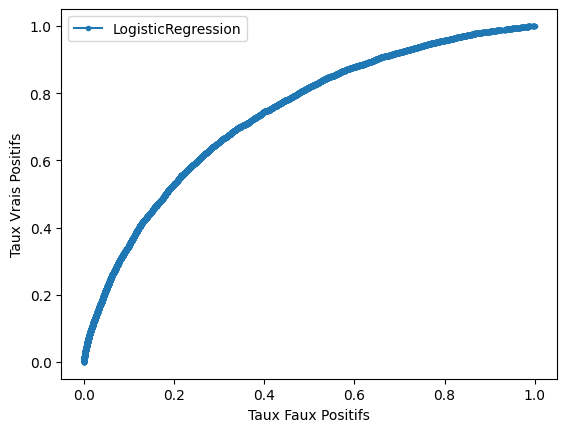

In [28]:
model = LogisticRegression()

params = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
        }
        
alpha = 0.5
beta = 10
cv_results = modeltrainer.initiate_model_trainer(
    X_train,
    y_train,
    X_test,
    y_test, 
    model, 
    params,
    alpha, 
    beta, 
    expirement_name = "expirment_2",
    run_name = "LogisticRegression",
    save_best_model=True)

In [29]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,mean_test_score,std_test_score,rank_test_score
0,20.550660,1.872222,18.311293,1.872222,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",NaN,NaN,-2147483648
21,94.928821,1.664218,0.187641,0.055491,100,l1,saga,"{'C': 100, 'penalty': 'l1', 'solver': 'saga'}",NaN,NaN,-2147483648
20,11364.892971,159.920958,4.547747,4.053385,100,l1,liblinear,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",NaN,NaN,-2147483648
19,67.001369,8.659729,0.489725,0.482740,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",NaN,NaN,-2147483648
18,978.395673,306.846741,2.152182,1.851259,10,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",NaN,NaN,-2147483648
17,103.780454,7.207176,0.177080,0.041005,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",NaN,NaN,-2147483648
16,12081.610198,21.936254,14.302064,5.941516,10,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",NaN,NaN,-2147483648
15,66.658606,3.578616,0.771476,0.703296,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",NaN,NaN,-2147483648
14,190.361435,16.688279,1.594728,0.998987,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",NaN,NaN,-2147483648
13,99.499764,3.436869,4.730594,3.965094,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",NaN,NaN,-2147483648


In [ ]:
# Afin de visualiser le rapport mlflow : 
# mlflow ui --backend-store-uri file:///C:\Users\Lenovo\Documents\DSPython\projetscoring\notebook\mlruns

In [19]:
save_transformed_df(cv_results, path='C:/Users/Lenovo/Documents/DSPython/projetscoring/notebook/artifacts/', filename="cv_results_Logistic.csv")

In [30]:
save_transformed_df(cv_results, path='C:/Users/Lenovo/Documents/DSPython/projetscoring/notebook/artifacts/', filename="cv_results_Logistic_2.csv")

In [31]:
from sklearn.neighbors import KNeighborsClassifier

Évaluation du model : KNeighborsClassifier --- En cours
GridSearchCV : KNeighborsClassifier --- En cours
Fitting 3 folds for each of 18 candidates, totalling 54 fits
GridSearchCV fit X_train y_train: KNeighborsClassifier --- OK
GridSearchCV Results: KNeighborsClassifier --- OK
Tracking mlflow: KNeighborsClassifier --- en cours
Tracking mlflow: KNeighborsClassifier --- OK
Fin training et tuning : KNeighborsClassifier --- OK
KNeighborsClassifier -- test_accuracy: 0.663252143561727 -- train_accuracy: 0.7864742541645933 --- Time_taken: 20185.02402663231 -- AUC_SCORE : 0.5895227423866378 -- Score_Metier : 30.946001770433757


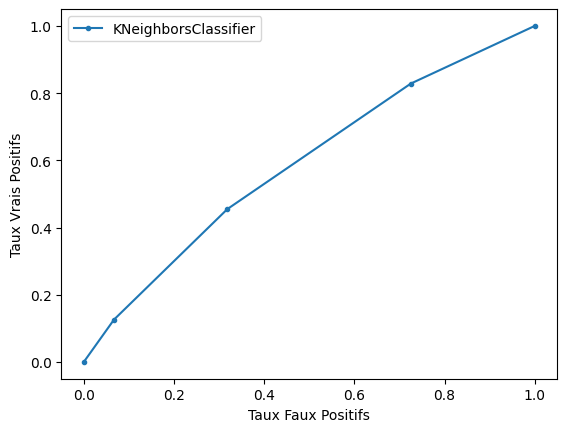

In [32]:
model = KNeighborsClassifier()

params = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute']
    }


alpha = 0.5
beta = 10
cv_results_knn = modeltrainer.initiate_model_trainer(
    X_train,
    y_train,
    X_test,
    y_test, 
    model, 
    params,
    alpha, 
    beta, 
    expirement_name = "expirment_2",
    run_name = "KNN",
    save_best_model=True)

In [33]:
cv_results_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,mean_test_score,std_test_score,rank_test_score
0,10.695873,0.454708,1306.755758,18.198164,ball_tree,3,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 3, '...",NaN,NaN,-2147483648
15,1.094451,0.092093,43.723533,3.684703,brute,5,distance,"{'algorithm': 'brute', 'n_neighbors': 5, 'weig...",NaN,NaN,-2147483648
14,1.188199,0.234038,45.692063,0.436962,brute,5,uniform,"{'algorithm': 'brute', 'n_neighbors': 5, 'weig...",NaN,NaN,-2147483648
13,1.505622,0.538002,45.710822,6.365424,brute,3,distance,"{'algorithm': 'brute', 'n_neighbors': 3, 'weig...",NaN,NaN,-2147483648
12,1.589244,0.259139,63.300569,6.410034,brute,3,uniform,"{'algorithm': 'brute', 'n_neighbors': 3, 'weig...",NaN,NaN,-2147483648
11,15.444870,0.496486,853.550897,49.892868,kd_tree,7,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 7, 'we...",NaN,NaN,-2147483648
10,15.382553,0.134424,1318.795069,280.334390,kd_tree,7,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 7, 'we...",NaN,NaN,-2147483648
9,14.141632,0.180145,1526.300857,25.868931,kd_tree,5,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 5, 'we...",NaN,NaN,-2147483648
8,14.485528,1.235578,1518.046716,16.356699,kd_tree,5,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 5, 'we...",NaN,NaN,-2147483648
7,13.319281,0.516060,1434.721293,27.607939,kd_tree,3,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 3, 'we...",NaN,NaN,-2147483648


In [16]:
from lazypredict.Supervised import LazyClassifier

In [17]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [1:26:26<00:00, 178.85s/it]  


In [18]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.69,0.69,0.69,0.76,2.57
LinearDiscriminantAnalysis,0.69,0.68,0.68,0.76,4.76
RidgeClassifierCV,0.69,0.68,0.68,0.76,2.70
RidgeClassifier,0.69,0.68,0.68,0.76,1.16
LogisticRegression,0.69,0.68,0.68,0.76,2.47
XGBClassifier,0.68,0.68,0.68,0.75,10.14
CalibratedClassifierCV,0.68,0.68,0.68,0.76,111.17
AdaBoostClassifier,0.69,0.68,0.68,0.76,16.31
LinearSVC,0.68,0.68,0.68,0.75,30.74


In [19]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.69,0.69,0.69,0.76,2.57
LinearDiscriminantAnalysis,0.69,0.68,0.68,0.76,4.76
RidgeClassifierCV,0.69,0.68,0.68,0.76,2.70
RidgeClassifier,0.69,0.68,0.68,0.76,1.16
LogisticRegression,0.69,0.68,0.68,0.76,2.47
XGBClassifier,0.68,0.68,0.68,0.75,10.14
CalibratedClassifierCV,0.68,0.68,0.68,0.76,111.17
AdaBoostClassifier,0.69,0.68,0.68,0.76,16.31
LinearSVC,0.68,0.68,0.68,0.75,30.74
